In [3]:
library(tidyverse)
library(ggpmisc)

In [4]:
# Read CSV file with working hours
# Source: https://stats.oecd.org/Index.aspx?DataSetCode=ANHRS#
df1 <- read.csv("ANHRS_30122021133943473.csv", header = TRUE, sep = ",")

# Glimpse of data
df1 %>% glimpse()

Rows: 3,333
Columns: 17
$ COUNTRY               <fct> AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS…
$ Country               <fct> Australia, Australia, Australia, Australia, Aust…
$ EMPSTAT               <fct> TE, TE, TE, TE, TE, TE, TE, TE, TE, TE, TE, TE, …
$ Employment.status     <fct> Total employment, Total employment, Total employ…
$ FREQUENCY             <fct> A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, …
$ Frequency             <fct> Annual, Annual, Annual, Annual, Annual, Annual, …
$ TIME                  <int> 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, …
$ Time                  <int> 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, …
$ Unit.Code             <fct> HOUR, HOUR, HOUR, HOUR, HOUR, HOUR, HOUR, HOUR, …
$ Unit                  <fct> Hours, Hours, Hours, Hours, Hours, Hours, Hours,…
$ PowerCode.Code        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ PowerCode             <fct> Units, Units, Units, Units, Units, Units, Units,…
$ Reference.Peri

In [5]:
# Select rows for total employment
df1 <- df1[df1$EMPSTAT %in% c('TE'),]

# Selct specific columns
df1 = df1[c('Country', 'Time', 'Value')]

# Rename Value column
colnames(df1)[3] = 'Working_hours'

# Select rows for specific countries
countries <- c('Belgium', 'Canada', 'France', 'Germany',
               'Italy', 'Netherlands', 'Norway', 'Sweden',
               'United Kingdom', 'United States')
df1 <- df1[df1$Country %in% countries,]

# Select rows for specific years
df1 <- df1[df1$Time %in% c(2000:2020),]

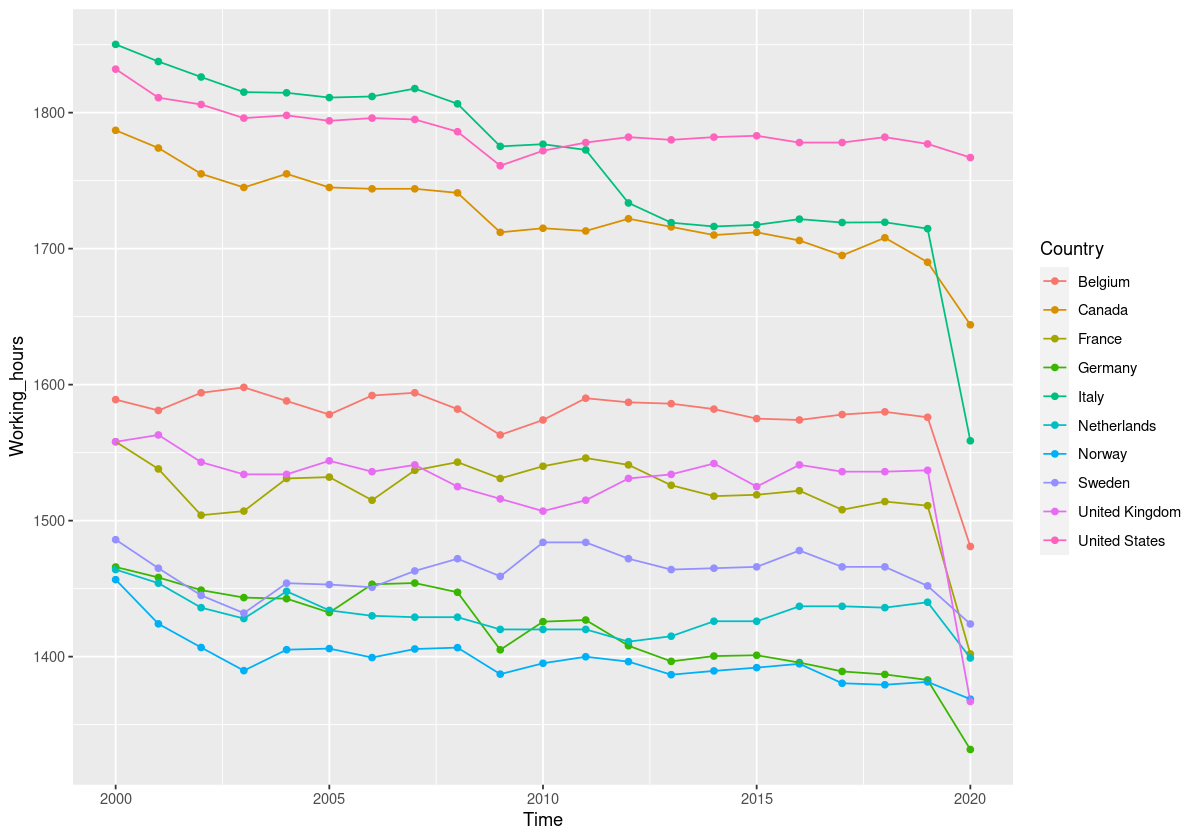

In [6]:
# Change plot size in notebook
options(repr.plot.width=10, repr.plot.height=7)

# Plot time to working hours
ggplot(data=df1, aes(x=Time, y=Working_hours, group=Country)) +
    geom_point(aes(color=Country)) + geom_line(aes(color=Country))

In [7]:
# # Plot time to working hours with all years in x-ticks
# ggplot(data=df1, aes(x=Time, y=Working_hours, group=Country)) + 
#     geom_point(aes(colour=Country)) + geom_line(aes(colour=Country)) +
#         scale_x_continuous(breaks=df1$Time)

In [8]:
# Read CSV file with earnings inequalities
# Source: https://stats.oecd.org/Index.aspx?DataSetCode=DEC_I#
df2 <- read.csv("DEC_I_30122021134130379.csv", header = TRUE, sep = ",")

# Glimpse of data
df2 %>% glimpse()

Rows: 12,329
Columns: 17
$ COUNTRY               <fct> AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS, AUS…
$ Country               <fct> Australia, Australia, Australia, Australia, Aust…
$ SEX                   <fct> MW, MW, MW, MW, MW, MW, MW, MW, MW, MW, MW, MW, …
$ Sex                   <fct> All persons, All persons, All persons, All perso…
$ SERIES                <fct> LPI, LPI, LPI, LPI, LPI, LPI, LPI, LPI, LPI, LPI…
$ Series                <fct> Low Pay Incidence, Low Pay Incidence, Low Pay In…
$ TIME                  <int> 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, …
$ Time                  <int> 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, …
$ Unit.Code             <fct> IDX, IDX, IDX, IDX, IDX, IDX, IDX, IDX, IDX, IDX…
$ Unit                  <fct> Index, Index, Index, Index, Index, Index, Index,…
$ PowerCode.Code        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ PowerCode             <fct> Units, Units, Units, Units, Units, Units, Units,…
$ Reference.Per

In [9]:
# Unique values in SERIES column
unique(df2$Unit.Code)

[1] IDX    P50P10 P90P10 P90P50       
Levels:  IDX P50P10 P90P10 P90P50

In [10]:
# Unique values in SEX column
unique(df2$SEX)

[1] MW    MEN   WOMEN
Levels: MEN MW WOMEN

In [11]:
# Select rows for P9050 in SERIES column
df2 <- df2[df2$SERIES %in% c("P9050"),]

# Select rows for MW in SEX column
df2 <- df2[df2$SEX %in% c("MW"),]

# Selct specific columns
df2 = df2[c('Country', 'Time', 'Value')]

# Rename Value column
colnames(df2)[3] = 'P90P50'

# Select rows for specific countries
df2 <- df2[df2$Country %in% countries,]

# Select rows for specific years
df2 <- df2[df2$Time %in% c(2000:2020),]

# Dimension of data set
dim(df2) 

[1] 159   3

In [12]:
# Dimension of data set
dim(df1)

[1] 210   3

In [13]:
# Delete rows in Working_hours where P90P50 is missing
df3 <- df1[paste(df1$Country, df1$Time) %in% paste(df2$Country, df2$Time), ]

# Add P90P50
df3 <- cbind(df3, df2[3])

# Rearange columns
df3 = df3[, c(1, 2, 4, 3)]

# Dimension of data
dim(df3)

[1] 159   4

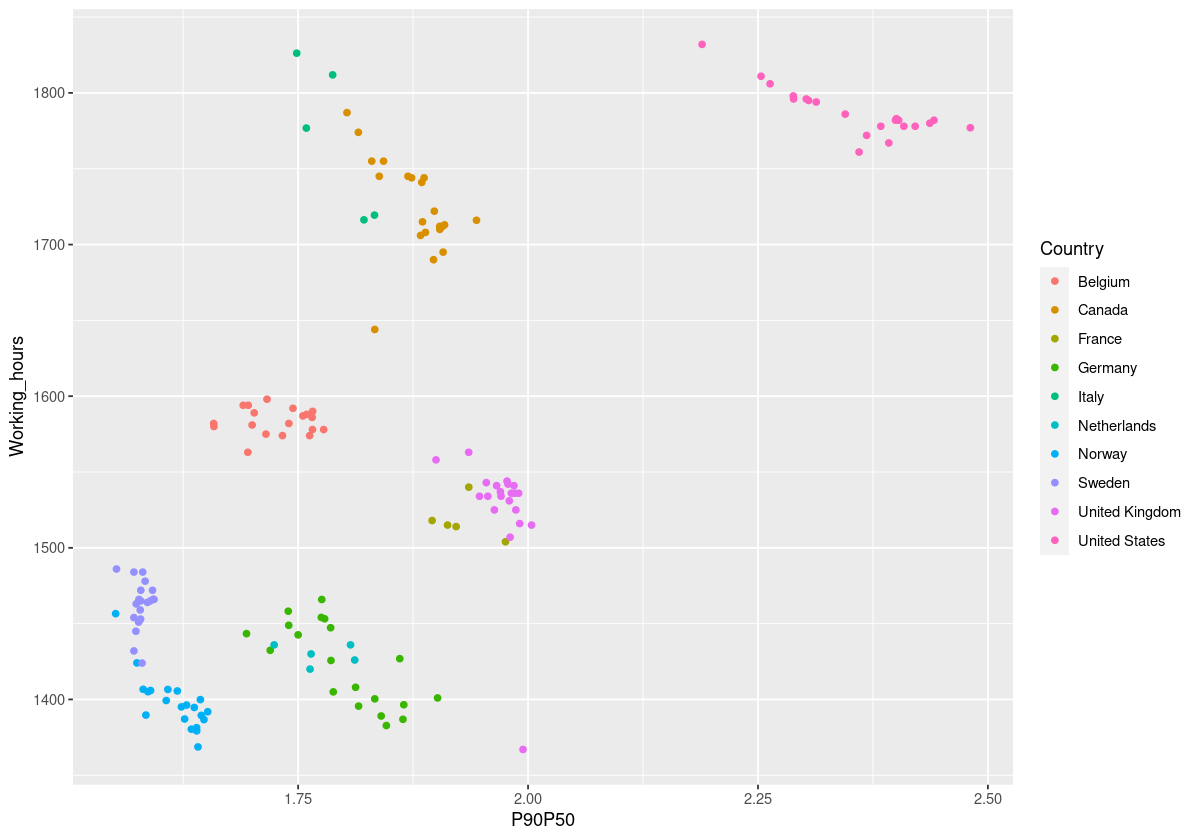

In [14]:
# Plot inequality earning to working hours
ggplot(data=df3, aes(x=P90P50, y=Working_hours)) + geom_point(aes(colour=Country))

In [15]:
# Create data set with country means
df_means = aggregate(df3[, 3:4], list(df3[, 1]), FUN=mean)
df_means

Group.1,P90P50,Working_hours
<fct>,<dbl>,<dbl>
Belgium,1.726327,1583.421
Canada,1.876436,1725.381
France,1.928205,1518.200
Germany,1.798522,1423.195
Italy,1.789913,1770.120
Netherlands,1.773888,1429.600
Norway,1.617124,1397.648
Sweden,1.578928,1461.952
United Kingdom,1.971270,1526.905


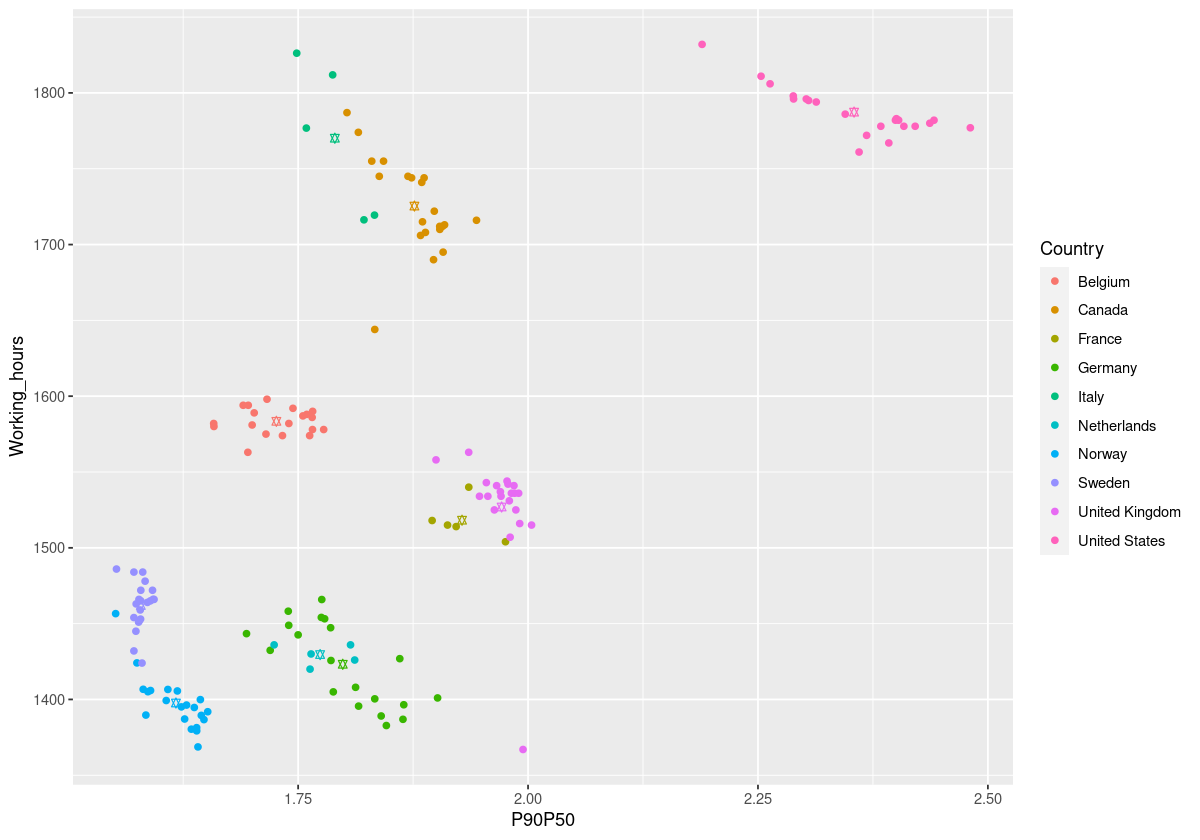

In [16]:
# Rename Country column
colnames(df_means)[1] = "Country"

# Plot inequality earning to working hours and country means
ggplot(data=df3, aes(x=P90P50, y=Working_hours)) +
    geom_point(aes(colour=Country)) +
    geom_point(data=df_means, aes(colour=Country), shape="star",
               show.legend = FALSE)

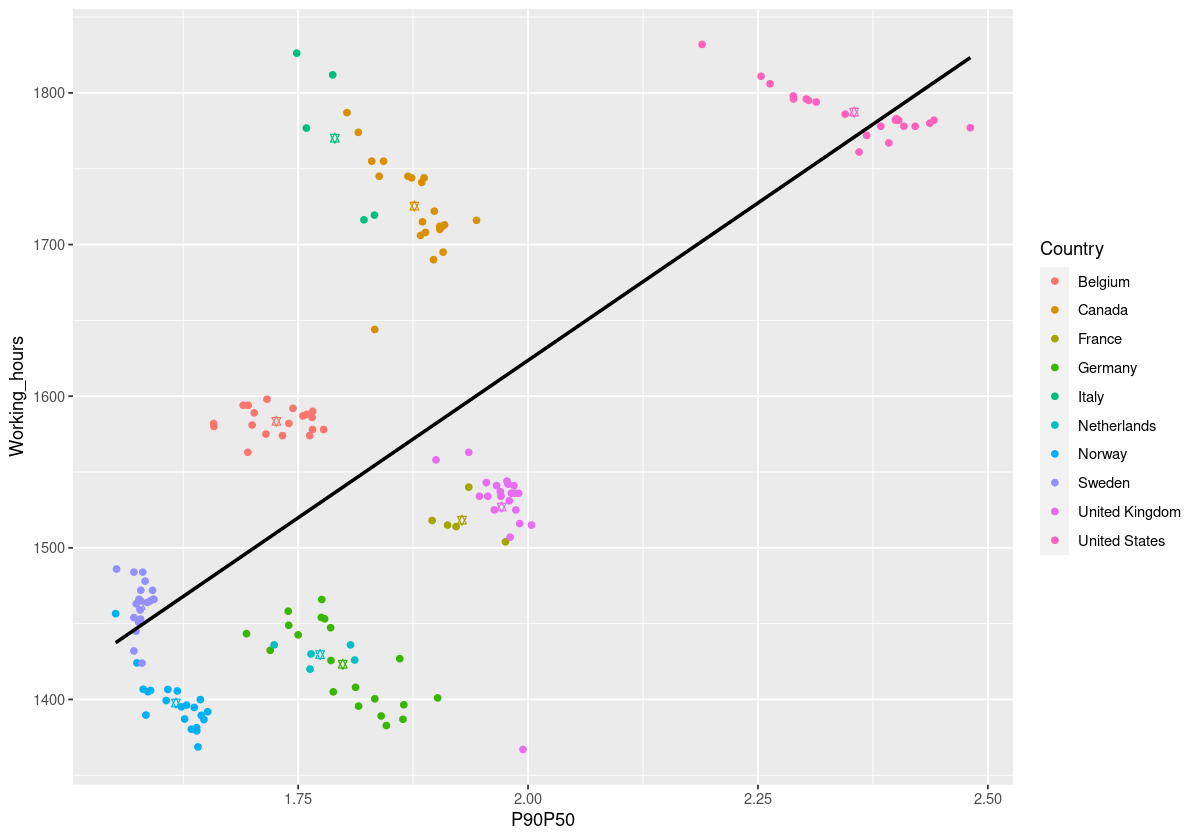

In [17]:
# Plot inequality earning to working hours and country means and linear 
# regression
ggplot(data=df3, aes(x=P90P50, y=Working_hours)) +
    geom_point(aes(colour=Country)) +
    geom_point(data=df_means, aes(colour=Country), shape="star",
               show.legend = FALSE) + 
    geom_smooth(method='lm', se=FALSE, color="black", formula = y ~ x)

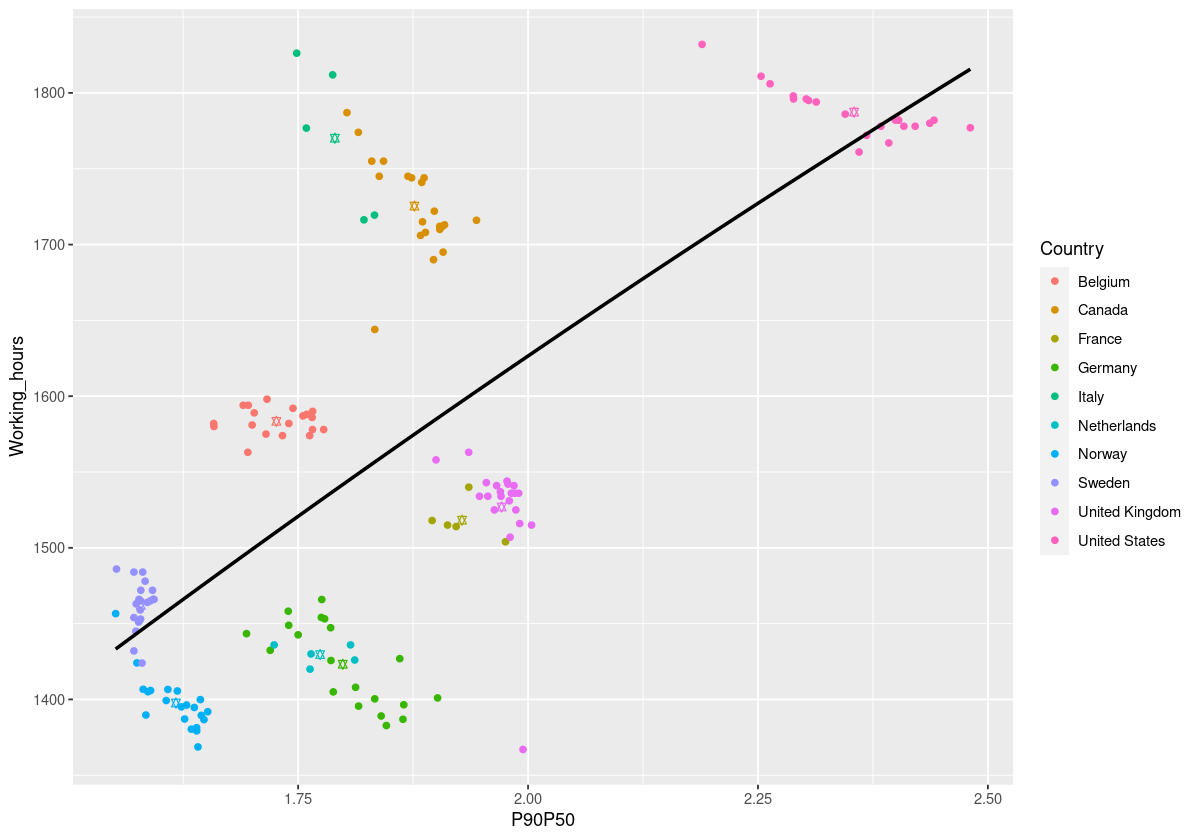

In [18]:
# Plot inequality earning to working hours and country means and polynomial 
# regression
my.formula = y ~ poly(x, 2)
ggplot(data=df3, aes(x=P90P50, y=Working_hours)) +
    geom_point(aes(colour=Country)) +
    geom_point(data=df_means, aes(colour=Country), shape="star",
               show.legend = FALSE) + 
    geom_smooth(method='lm', se=FALSE, color="black", formula = my.formula)

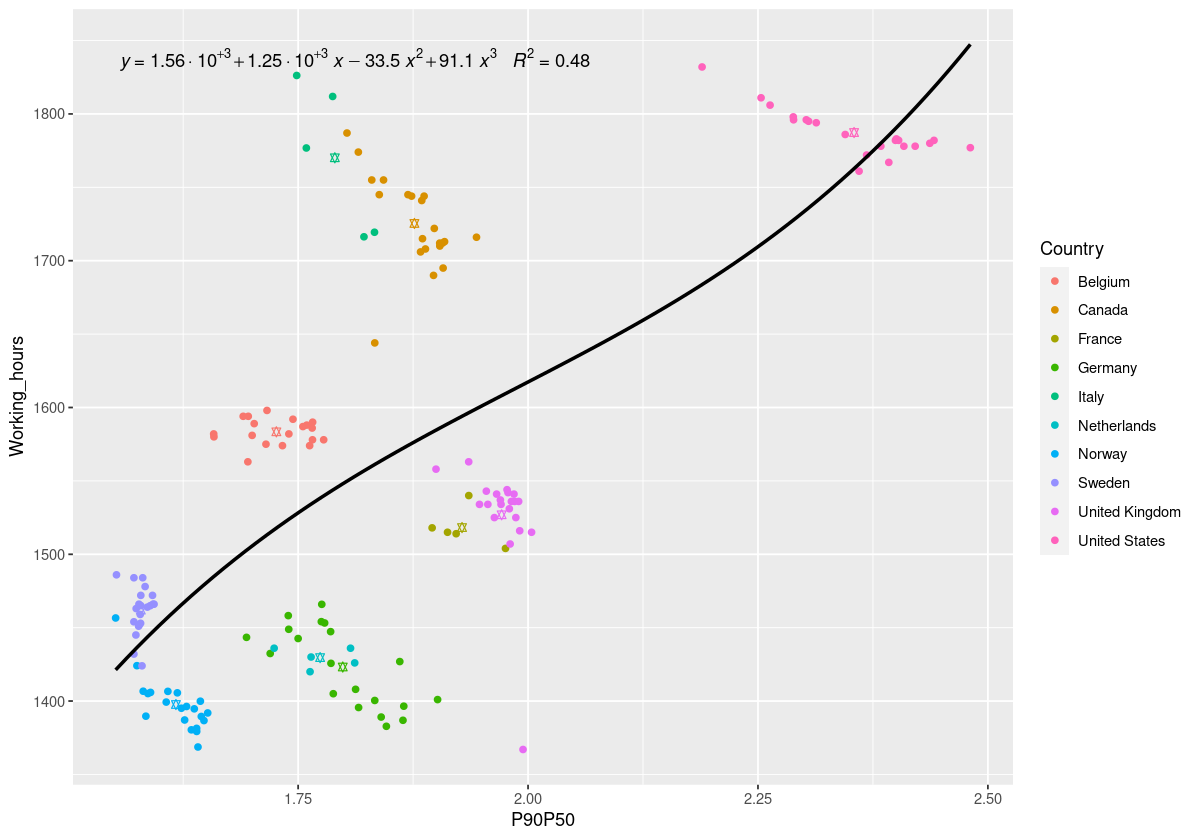

In [19]:
# Plot inequality earning to working hours and country means and polynomial 
# regression and R2 score
my.formula = y ~ poly(x, 3)
ggplot(data=df3, aes(x=P90P50, y=Working_hours)) +
    geom_point(aes(colour=Country)) +
    geom_point(data=df_means, aes(colour=Country), shape="star",
               show.legend = FALSE) + 
    geom_smooth(method='lm', se=FALSE, color="black", formula = my.formula) +
    stat_poly_eq(formula = my.formula, 
                 aes(label = paste(..eq.label.., ..rr.label.., sep = "~~~")), 
                 parse = TRUE)